<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/Lesson_7_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:

from google.colab import files
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [22]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [12]:
ds = fetch_california_housing();
df = pd.DataFrame(data=np.c_[ds['data'], ds['target']], columns=ds['feature_names'] + ['target'])
#df.info()
df.isna().sum()
# пропусков нет

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [45]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [26]:
def run_fit(_df):
  X_train, X_test, y_train, y_test = train_test_split(_df.drop(columns=['target']), _df['target'], test_size=0.2, random_state=42)

  model = make_pipeline(
      StandardScaler(),
      LinearRegression()
  )
  model.fit(X_train, y_train)
  y_pred_on_train = model.predict(X_train)
  y_pred_on_test = model.predict(X_test)
  print(f"model score={model.score(X_test, y_test)}")
  print(f"R2 score, train={r2_score(y_train, y_pred_on_train)}, test={r2_score(y_test, y_pred_on_test)}")
  print(f"RMSE score, train={np.sqrt(mean_squared_error(y_train, y_pred_on_train))}, test={np.sqrt(mean_squared_error(y_test, y_pred_on_test))}")

In [28]:
run_fit(df)



model score=0.575787706032451
R2 score, train=0.6125511913966952, test=0.575787706032451
RMSE score, train=0.7196757085831575, test=0.7455813830127763


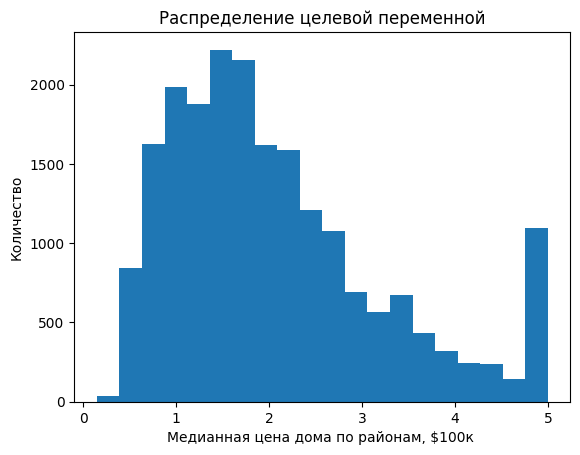

In [24]:
# хвост с большей ценой похож на выброс

n_bins = 20
plt.hist(df['target'], bins=n_bins)
plt.title('Распределение целевой переменной')
plt.xlabel('Медианная цена дома по районам, $100к ')
plt.ylabel('Количество')
plt.show()

In [25]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Матрица корреляции показывает, основной вклад в целевую переменную, скорее всего, будет вносить медианный доход.
Сильно коррелируют среднее количество комнат и среднее количество спален, а также широта и долгота из координат.
Исключим признаки AveBedrms и Longitude.

In [29]:
run_fit(df.drop(columns=['AveBedrms', 'Longitude']))

model score=0.5059804263462322
R2 score, train=0.5244970973178325, test=0.5059804263462322
RMSE score, train=0.7972715471833608, test=0.8045916260704176


In [43]:
df_trim = df.drop(columns=['AveBedrms', 'Longitude'])
df_trim.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1425.476744,3.070655,35.631861,2.068558
std,1.899822,12.585558,2.474173,1132.462122,10.386050,2.135952,1.153956
min,0.499900,1.000000,0.846154,3.000000,0.692308,32.540000,0.149990
25%,2.563400,18.000000,4.440716,787.000000,2.429741,33.930000,1.196000
50%,3.534800,29.000000,5.229129,1166.000000,2.818116,34.260000,1.797000
75%,4.743250,37.000000,6.052381,1725.000000,3.282261,37.710000,2.647250
max,15.000100,52.000000,141.909091,35682.000000,1243.333333,41.950000,5.000010


In [40]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass


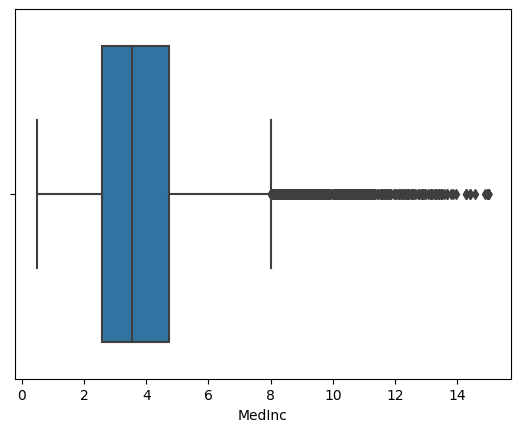

In [46]:
get_boxplot(df, columns=['MedInc'])

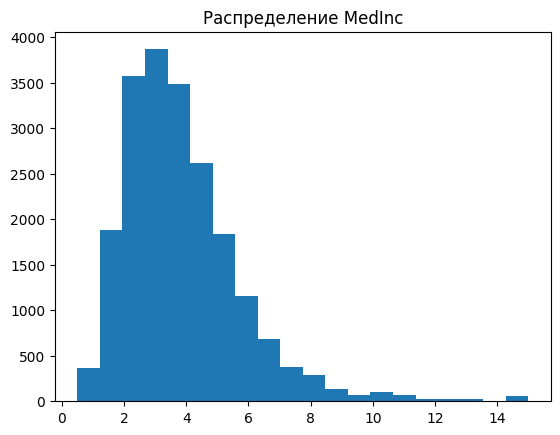

In [35]:
# возможно, есть выброс

n_bins = 20
plt.hist(df['MedInc'], bins=n_bins)
plt.title('Распределение MedInc')
plt.show()

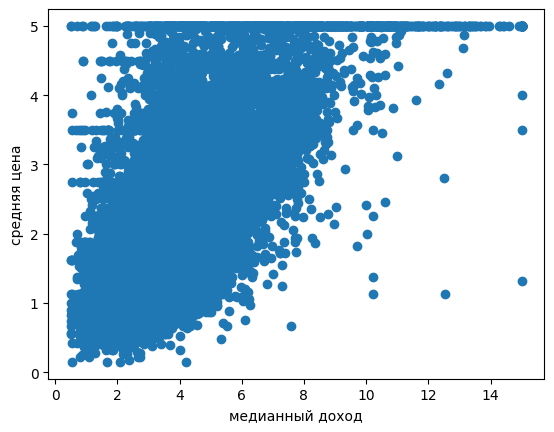

In [49]:
plt.plot( df['MedInc'], df['target'], marker='o', linestyle='' )
plt.xlabel('медианный доход')
plt.ylabel('средняя цена')
plt.show()

Медианный доход выше определенного явно перестает влиять на среднюю цену.
Выбросим объекты с доходом выше 12

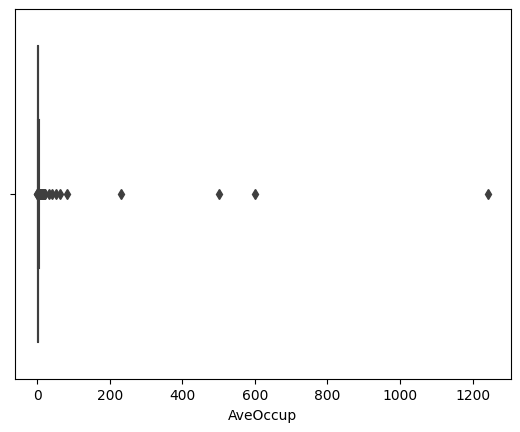

In [52]:
# Судя по всему в выборке несколько районов, где есть многоквартирные дома.
# Ценообразование для многоквартирных домов скорее всего устроено по-другому, чем для домов с меньшим количеством жильцов
# Отбросим объекты, где жильцов больше 200
get_boxplot(df, columns=['AveOccup'])


In [67]:
df_no_outs = df_trim.copy()
df_no_outs = df_no_outs[df_no_outs['AveOccup']<200]
df_no_outs = df_no_outs[df_no_outs['MedInc']<12]
print(f"Отбросили {len(df_trim.index) - len(df_no_outs.index)}, терпимо")
df_no_outs.describe()


Отбросили 117, терпимо


,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,target
count,20523.000000,20523.000000,20523.000000,20523.000000,20523.000000,20523.000000,20523.000000
mean,3.814882,28.614335,5.411817,1427.422502,2.945870,35.632868,2.053133
std,1.750067,12.566425,2.467076,1131.733432,1.222081,2.137496,1.137385
min,0.499900,1.000000,0.846154,3.000000,0.692308,32.540000,0.149990
25%,2.559850,18.000000,4.436385,788.000000,2.428571,33.930000,1.192000
50%,3.525000,29.000000,5.221839,1168.000000,2.817439,34.260000,1.791000
75%,4.718800,37.000000,6.034365,1727.000000,3.282400,37.720000,2.629000
max,11.999300,52.000000,141.909091,35682.000000,83.171429,41.950000,5.000010


In [70]:
# после отбраковки выбросов показатели модели несколько улучшились
run_fit(df_no_outs)

model score=0.532599162764255
R2 score, train=0.5441918302008115, test=0.532599162764255
RMSE score, train=0.766903893843459, test=0.7814694622391307


In [71]:
# даже после отбраковки выброса количество жильцов имеет сильно смеценное распределение. Попробуем выровнять, взяв логарифм
df_no_outs2 = df_no_outs.copy()
df_no_outs2['AveOccup'] = df_no_outs2['AveOccup'].transform(np.log)

run_fit(df_no_outs2)

model score=0.5750339932530277
R2 score, train=0.592941348167926, test=0.5750339932530277
RMSE score, train=0.724733581225187, test=0.7451511303870884


In [72]:
# попробуем тоже самое проделать с Population
df_no_outs3 = df_no_outs2.copy()
df_no_outs3['Population'] = df_no_outs3['Population'].transform(np.log)

run_fit(df_no_outs3)
# стало похуже, вернемся назад

model score=0.5747872924812552
R2 score, train=0.5917709220374127, test=0.5747872924812552
RMSE score, train=0.7257747558147704, test=0.7453673861401078


In [73]:
# а вдруг возраст дома влияет сильнее, чем просто линейно
df_no_outs4 = df_no_outs2.copy()
df_no_outs4['HouseAge'] = df_no_outs4['HouseAge'].transform(np.square)

run_fit(df_no_outs4)
# тоже ничего хорошего не вышло

model score=0.571885901484219
R2 score, train=0.5920348710731544, test=0.571885901484219
RMSE score, train=0.7255400854632198, test=0.7479060281536923


Выводы:
1. над данными были сделаны следующие преобразования:
- по матрице коррелации определены 4 признака со значительной корреляцией, из них 2 отброшены.
- проведен анализ выбросов, обнаружены выбросы в 2-х признаках, соответствующие строки данных отброшены
- к количеству жильцов примененено логарифмическое преобразование, что улучшило модель
- сделана попытка применить преобразования к нескольким другим признакам, но они улучшения не дали
2.


| Модель | RMSE | R2 |  
| --- | --- | --- |  
| Исходная | 0.7455813830127763 | 0.575787706032451 |
| no AveBdrms, Longitude | 0.8045916260704176 | 0.5059804263462322 |
| no outliers | 0.7814694622391307 | 0.532599162764255 |
| log(AveOccup) | 0.7451511303870884 | 0.5750339932530277 |
| --- | --- | --- |


3. Исходная модель до обработки данных имеет наилучший показатель R2. Отбрасывание 2-х признаково по таблице корреляции значительно ухудшило точность модели, но дальнейшая обработка данных позволила вернуть R2 практически к исходным значениям.

